# Jupyter Notebook Purpose
- Load in the .csv and .csv.gz files into DataFrames and merge them
- THE REST IS UP TO YOU

In [ ]:
# Group 10 Collaborators
COLLABORATORS = ["Nidhi Punja",
                 "Judith Roth",
                 "Iman Dordizadeh Basirabad",
                 "Daniel Adam Cebula",
                 "Cynthia Fung",
                 "Ben Klassen"]

# Group 10 Members
for _ in COLLABORATORS:
    print(f"Group 10 Member: {_:->30}")

# Table of Contents

## 1. [Python Dependencies](#1)
___
## 2. [Folder Creation](#2)
- repeated just in case
___
## 3. [Read in the Data](#3)
___
## 4. [Explore Latitude and Longitude Data](#4)
___

# 1
# Dependencies

In [2]:
# Python Modules for Miscellaneous reasons
from zipfile import ZipFile  # to read and write to zipped folders
import requests  # simple HTTP library for Python
import os        # portable way to use operating system functionalities
import io        # Tool for working with streams (Input/Ouput data)
import datetime  # python classes for manipulating dates and times
import dateutil  # powerful extensions to standard datetime Python module
import time      # used for time.sleep() to delay the HTTP requests ever so slightly
import re        # used for Python regex library
import math      # radians, cos, sin, asin and sqrt are used for haversine formula
from IPython.display import display # use this to see the entire DataFrame in the right format
from create_folder import create_folder # create folder function that I have defined and placed in create_folder.py file

In [3]:
# DATA ANALYSIS / VISUALIZATION Python Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2
# Folder Creation

In [4]:
PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name="PROCESSED_ZIPPED")
FIRE_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_INCIDENTS"))
WEATHER_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "TORONTO_WEATHER"))
STATIONS_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_STATIONS"))

# 3
# Read in the data

In [5]:
# read in the metadata from .csv into memory
# use this metatdata to explain the columns below
df_metadata = pd.read_csv(
    os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET_METADATA.csv"),
    index_col="COLUMN_NAME")

# display it
with pd.option_context('display.max_colwidth', 300):
    display(df_metadata)

,COLUMN_DESCRIPTION
COLUMN_NAME,
INCIDENT_NUM,Toronto Fire Services (TFS) incident number. Used as index for the DataFrame because it is unique for each call.
DATETIME,"Year, Month, Day, Hour, Minute, Second of when TFS was notified of the incident (alarm)."
MINUTES_ARRIVAL,Minutes it took for the first unit to arrive (after alarm).
MINUTES_LEAVE,Minutes it took for the first unit to leave (after arrival).
FIRE_STATION,Number of TFS Station where incident occurred.
FIRE_STATION_CLOSEST,Number of closest (by Haversine formula in 02-Geopandas_and_Merging.ipynb) TFS Station where incident occurred.
NAME,Name of column FIRE_STATION TFS Fire Station.
ADDRESS,Address of column FIRE_STATION TFS Fire Station.
LATITUDE_STATION,Latitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.


In [6]:
# read the merged DataFrame from .csv.bz2 file into DataFrame
PATH_MERGED_CSV_BZ2 = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET.csv.bz2")
df_total = pd.read_csv(PATH_MERGED_CSV_BZ2,
                       compression='bz2', index_col="INCIDENT_NUM", parse_dates=["DATETIME"])

# make the columns categorical (for faster queries)
df_total["CAD_TYPE"] = pd.Categorical(df_total["CAD_TYPE"])
df_total["CAD_CALL_TYPE"] = pd.Categorical(df_total["CAD_CALL_TYPE"])
df_total["FINAL_TYPE"] = pd.Categorical(df_total["FINAL_TYPE"])
df_total["CALL_SOURCE"] = pd.Categorical(df_total["CALL_SOURCE"])
df_total["NAME"] = pd.Categorical(df_total["NAME"])
df_total["ADDRESS"] = pd.Categorical(df_total["ADDRESS"])
df_total["WARD_NAME"] = pd.Categorical(df_total["WARD_NAME"])
df_total["MUN_NAME"] = pd.Categorical(df_total["MUN_NAME"])

# display it
with pd.option_context('display.max_columns', None):
    display(df_total.head())

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


In [7]:
# get some info about the dataframe
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975113 entries, F11000010 to F18139242
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DATETIME              975113 non-null  datetime64[ns]
 1   MINUTES_ARRIVAL       951654 non-null  float64       
 2   MINUTES_LEAVE         951650 non-null  float64       
 3   FIRE_STATION          975113 non-null  int64         
 4   FIRE_STATION_CLOSEST  975113 non-null  int64         
 5   NAME                  975113 non-null  category      
 6   ADDRESS               975113 non-null  category      
 7   LATITUDE_STATION      975113 non-null  float64       
 8   LONGITUDE_STATION     975113 non-null  float64       
 9   WARD_NAME             975113 non-null  category      
 10  MUN_NAME              975113 non-null  category      
 11  CAD_TYPE              975113 non-null  category      
 12  CAD_CALL_TYPE         975113 non-null  category     

# 4
# Explore

In [8]:
# groupby on latitude and longitude and see the count
(df_total[["LATITUDE", "LONGITUDE", "CAD_TYPE"]]
                .groupby(["LATITUDE", "LONGITUDE"])
                .count()
                .rename(columns={"CAD_TYPE":"COUNT"})
                .sort_values(by="COUNT", ascending=False))

# as you can see it appears that LATITUDE and LONGITUDE of 0 maybe another null that the system uses
# I will need to rectify this in the Data Munging portion by replacing 0 with np.nan

,,COUNT
LATITUDE,LONGITUDE,
0.000000,0.000000,71142
43.658295,-79.371032,2405
43.656163,-79.370123,2298
43.667295,-79.373778,1977
43.746814,-79.583807,1769
...,...,...
43.730929,-79.604891,1
43.800268,-79.359042,1
43.624492,-79.477603,1


In [9]:
# lets slice it out for now
df_slice = df_total.loc[((df_total["LATITUDE"] != 0) &
                          df_total["LONGITUDE"] != 0), :]

# Get count of TFS visits for different locations
df_groupby = (df_slice[["LATITUDE", "LONGITUDE", "CAD_TYPE"]]
                .groupby(["LATITUDE", "LONGITUDE"])
                .count()
                .rename(columns={"CAD_TYPE":"COUNT"})
                .sort_values(by="COUNT", ascending=False))
df_groupby

,,COUNT
LATITUDE,LONGITUDE,
43.658295,-79.371032,2405
43.656163,-79.370123,2298
43.667295,-79.373778,1977
43.746814,-79.583807,1769
43.712046,-79.281003,1560
...,...,...
43.764162,-79.211585,1
43.637785,-79.398549,1
43.743974,-79.281060,1


In [10]:
# so 20,000 rows...lets look at the top 50
df_top_50 = df_groupby.iloc[0:50].reset_index()
df_top_50

,LATITUDE,LONGITUDE,COUNT
0,43.658295,-79.371032,2405
1,43.656163,-79.370123,2298
2,43.667295,-79.373778,1977
3,43.746814,-79.583807,1769
4,43.712046,-79.281003,1560
5,43.670226,-79.386788,1424
6,43.646773,-79.530554,1407
7,43.781638,-79.416002,1405
8,43.645987,-79.379135,1401
9,43.660654,-79.374851,1378


In [11]:
df_top_50.loc[0, "LATITUDE"]

43.658294696000006

In [12]:
# lets check out the top one
df_slice.loc[(df_slice["LATITUDE"] == df_top_50.loc[0, "LATITUDE"]) &
             (df_slice["LONGITUDE"] == df_top_50.loc[0, "LONGITUDE"]), :]

# 300 Dundas Street East, Toronto

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000259,2011-01-01 08:12:02,3.533,13.250,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,11.5,0.9,6.40,11.60,0.0,3.7,8.70,0.0
F11000921,2011-01-02 20:57:03,3.283,14.933,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,1.1,-4.5,-2.37,20.37,0.0,0.0,0.00,0.0
F11001015,2011-01-03 04:43:10,10.083,3.433,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,1.1,-6.0,-2.13,20.13,0.0,0.0,0.20,0.0
F11001082,2011-01-03 10:16:23,4.650,5.933,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,1.1,-6.0,-2.13,20.13,0.0,0.0,0.20,0.0
F11002219,2011-01-06 06:53:07,4.200,7.833,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,-1.0,-8.5,-4.47,22.47,0.0,0.0,2.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F18137760,2018-12-27 17:46:51,3.217,15.600,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,8.0,-9.0,-0.87,18.87,0.0,4.2,5.97,0.0
F18138275,2018-12-29 00:49:45,5.500,31.267,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,4.2,-5.7,-1.80,19.80,0.0,0.0,0.47,0.0
F18138498,2018-12-29 18:44:22,3.933,12.517,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.658295,-79.371032,4.2,-5.7,-1.80,19.80,0.0,0.0,0.47,0.0


In [13]:
# How about the second one
df_slice.loc[(df_slice["LATITUDE"] == df_top_50.loc[1, "LATITUDE"]) &
             (df_slice["LONGITUDE"] == df_top_50.loc[1, "LONGITUDE"]), :]

# 325 Front Street East, Toronto

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000212,2011-01-01 04:33:43,4.983,13.167,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,11.5,0.9,6.40,11.60,0.0,3.7,8.70,0.0
F11001027,2011-01-03 06:21:14,3.600,7.217,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,1.1,-6.0,-2.13,20.13,0.0,0.0,0.20,0.0
F11001239,2011-01-03 16:23:43,4.533,26.017,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,1.1,-6.0,-2.13,20.13,0.0,0.0,0.20,0.0
F11001244,2011-01-03 16:35:08,2.200,4.650,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,1.1,-6.0,-2.13,20.13,0.0,0.0,0.20,0.0
F11001797,2011-01-05 03:34:14,4.750,2.150,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,0.7,-6.7,-2.93,20.93,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F18137391,2018-12-26 13:23:41,3.150,6.967,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,3.1,-4.3,-0.67,18.67,0.0,0.0,0.00,0.0
F18137522,2018-12-26 23:26:02,3.500,7.983,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,3.1,-4.3,-0.67,18.67,0.0,0.0,0.00,0.0
F18137569,2018-12-27 04:49:33,3.800,6.067,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,8.0,-9.0,-0.87,18.87,0.0,4.2,5.97,0.0


In [14]:
# I can generate a DataFrame to plot these on a map highlighting the
# CAD_TYPE, CAD_CALL_TYPE, FINAL_TYPE or CALL_SOURCE

In [15]:
# what might be interesting is to see the number of calls each Fire Station Answers
df_groupby_stations = (df_slice[["FIRE_STATION", "CAD_TYPE"]]
                .groupby(["FIRE_STATION"])
                .count()
                .rename(columns={"CAD_TYPE":"COUNT"})
                .sort_values(by="COUNT", ascending=False)
                .reset_index())

df_groupby_stations

,FIRE_STATION,COUNT
0,314,27169
1,426,26968
2,332,26087
3,325,24361
4,313,20886
...,...,...
79,211,4509
80,215,4459
81,424,1937
82,335,1032


In [16]:
# lets look at the top fire stations for calls and let's check out the distribution of their "CAD_TYPE"s
# huh medical and fire alarms all over the place

with pd.option_context("display.max_rows", None):
    display(df_slice.loc[df_slice["FIRE_STATION"] == df_groupby_stations
              .loc[0,"FIRE_STATION"],["CAD_TYPE", "DATETIME"]]
              .groupby("CAD_TYPE")
              .count()
              .rename(columns={"DATETIME":"COUNT"})
              .sort_values(by="COUNT", ascending=False)
              .reset_index()[:68])

# very interesting

,CAD_TYPE,COUNT
0,Medical,13897
1,FAHRD - Alarm Highrise Residential Downtown,3053
2,FAHCD - Alarm Highrise - Commercial - Downtown,1697
3,FAID - Alarm Institution Downtown,1685
4,FACI - Alarm Commercial/Industrial,1002
5,REE - Rescue - Elevator,782
6,FIG - Fire - Grass/Rubbish,583
7,FAIS - Alarm - Institution - School,415
8,VEPI - Vehicle - Personal Injury,356
9,FIHRD - Fire - Highrise Residential - Downtown,351


In [17]:
# lets look at the seconds from the top fire station for calls and let's check out the distribution of their "CAD_TYPE"s
# huh medical and fire alarms all over the place again

with pd.option_context("display.max_rows", None):
    display(df_slice.loc[df_slice["FIRE_STATION"] == df_groupby_stations
              .loc[1,"FIRE_STATION"],["CAD_TYPE", "DATETIME"]]
              .groupby("CAD_TYPE")
              .count()
              .rename(columns={"DATETIME":"COUNT"})
              .sort_values(by="COUNT", ascending=False)
              .reset_index()[:74])

# might be a good thing to talk about
# maybe instead of sending out fire departments in gear to all callouts instead
# send out smaller units if the threat is confirmed to be minimal

,CAD_TYPE,COUNT
0,Medical,14308
1,FAHR - Alarm Highrise Residential,2203
2,FAR - Alarm Residential,1225
3,FIG - Fire - Grass/Rubbish,928
4,FACI - Alarm Commercial/Industrial,853
5,FAI - Alarm Institution,789
6,FIR - Fire - Residential,750
7,REE - Rescue - Elevator,746
8,FIHR - Fire - Highrise Residential,583
9,CC - Check Call,506


In [18]:
# lets look at geographic locations and the time it takes for
# the fire department to arrive and to leave
# also only show it for the top 50 locations
df_arrival_leave_time = (df_slice[["LATITUDE", "LONGITUDE", "MINUTES_ARRIVAL", "MINUTES_LEAVE"]]
                .groupby(["LATITUDE", "LONGITUDE"])
                .agg(["count", "mean", "std"])
                .reset_index()
                .sort_values(by=("MINUTES_ARRIVAL", "count"), ascending=False)
                .reset_index()
                .drop(columns=["index", ("MINUTES_ARRIVAL", "count"), ("MINUTES_LEAVE", "count")]).dropna())
df_arrival_leave_time

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


LATITUDE  LONGITUDE MINUTES_ARRIVAL           MINUTES_LEAVE           
                                       mean       std          mean        std
0      43.658295 -79.371032        3.823556  1.928781     11.171446  15.148696
1      43.656163 -79.370123        3.974047  1.108558     12.481504  13.014917
2      43.667295 -79.373778        4.131376  1.245857     15.602722  17.381275
3      43.746814 -79.583807        5.716498  7.145329     17.396027  14.336280
4      43.712046 -79.281003        4.968309  1.525107     13.841365  10.428519
...          ...        ...             ...       ...           ...        ...
19670  43.724330 -79.379623        5.591500  0.765797     16.525000  11.302395
19671  43.800961 -79.276635        3.575000  0.766504     13.133500   0.164756
19672  43.724505 -79.564553        5.517000  1.484924      9.275000   7.978993
19673  43.724830 -79.323652        5.741500  1.472903     61.308500  85.477189
19674  43.724602 -79.519909        6.016500  0.589020     13.750000   9.004298

[19675 rows x 6 columns]

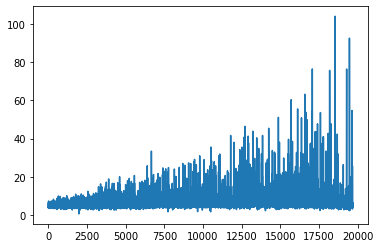

In [19]:
# lets plot it to see if fewer calls means longer times for TFS arrival
# Look at that...interesting
plt.plot(df_arrival_leave_time[("MINUTES_ARRIVAL", "mean")]);

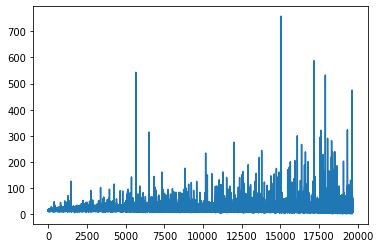

In [20]:
# lets plot it to see if fewer calls means longer times for TFS to leave
# hmm not as random...
plt.plot(df_arrival_leave_time[("MINUTES_LEAVE", "mean")]);

In [21]:
with pd.option_context("display.max_columns", None):
    display(df_slice.head())

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
